## Logistic Regression - Lesson 4

Para implementar el mismo ejercicio de regresión logística a un dataset deiferente, se ha escogido un conjunto de datos sobre más de 2000 estudiantes de secundarias y algunas de sus características: como hábitos de estudio, actividades extracurriculares, etc.

**Este es el link del dataset:** https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset



---

Por: Ángela Daniela Córdoba Álvarez


---



In [ ]:
import pandas as pd
import numpy as np

df_student = pd.read_csv('Student_performance_data _.csv')

df_student.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [ ]:
# Select the columns we want to use
columns_to_select = ['StudentID','Gender','StudyTimeWeekly', 'Tutoring','Extracurricular', 'GPA', 'Ethnicity']
students = df_student.loc[:, columns_to_select]

# Drop rows where 'Tutoring' is missing
students.dropna(subset=['Tutoring'], inplace=True)

# Map 'Tutoring' values in the 'students' DataFrame
students['Tutoring'] = students['Tutoring'].map({0: 'Yes', 1: 'No'})

# Map 'Gender' values in the 'students' DataFrame
students['Gender'] = students['Gender'].map({0: 'Female', 1: 'Male'}) # Add this line

students.head()

,StudentID,Gender,StudyTimeWeekly,Tutoring,Extracurricular,GPA,Ethnicity
0,1001,Male,19.833723,No,0,2.929196,0
1,1002,Female,15.408756,Yes,0,3.042915,0
2,1003,Female,4.210570,Yes,0,0.112602,2
3,1004,Male,10.028829,Yes,1,2.054218,0
4,1005,Male,4.672495,No,0,1.288061,0


# Let's have a look to our data!

By visualising it with Seaborn

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar los valores únicos en la columna Gender
unique_genders = df_student['Gender'].unique()
unique_genders2 = df_student['Ethnicity'].unique()
print(unique_genders)
print(unique_genders2)

# Mapear para el Gender
print("Valores únicos en la columna Gender antes de mapear:", df_student['Gender'].unique())
df_student['Gender'] = df_student['Gender'].map({0: 'Female', 1: 'Male'})
# Verificar los valores únicos en la columna Gender después de mapear
print("Valores únicos en la columna Gender después de mapear:", df_student['Gender'].unique())

# Mapear para Tutoring
print("Valores únicos en la columna Ethnicity antes de mapear:", df_student['Tutoring'].unique())
df_student['Tutoring'] = df_student['Tutoring'].map({0: 'Yes', 1: 'No'})
# Verificar los valores únicos en la columna Tutoring después de mapear
print("Valores únicos en la columna Tutoring después de mapear:", df_student['Tutoring'].unique())

[1 0]
[0 2 1 3]
Valores únicos en la columna Gender antes de mapear: [1 0]
Valores únicos en la columna Gender después de mapear: ['Male' 'Female']
Valores únicos en la columna Ethnicity antes de mapear: [1 0]
Valores únicos en la columna Tutoring después de mapear: ['No' 'Yes']


In [ ]:
print(students['Tutoring'].unique())

['No' 'Yes']


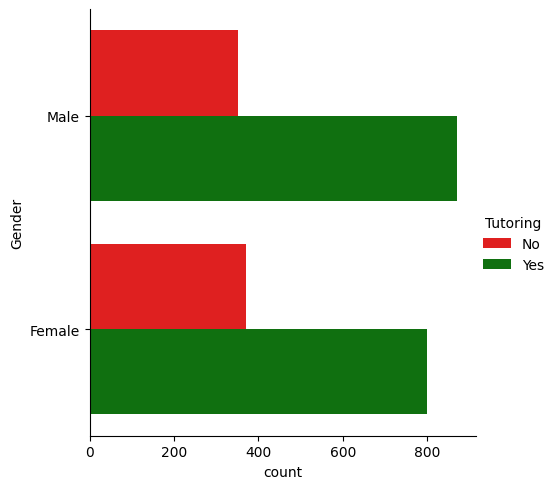

In [ ]:
import seaborn as sns
# Specify colors for each values of the hue variable
palette = {
    'Male': 'blue',
    'Female': 'pink',
    'Yes': 'green',  # Keys should match the mapped values
    'No': 'red',    # Keys should match the mapped values
}
# Plot a bar plot
sns.catplot(
    data=students, y="Gender", hue="Tutoring", kind="count",
    palette=palette,
)

# Data pre-processing

Let's encode features and labels to better plot the data and train the model

In [ ]:
# Let's look at the different values of the 'Extracurricular' column
students['Extracurricular'].unique()

array([0, 1])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Encode the 'Extracurricular' column using ordinal encoding
item_size_categories = [['0', '1']]
ordinal_features = ['Extracurricular']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# Encode all the other features using one-hot encoding
categorical_features = ['StudentID','Gender','StudyTimeWeekly', 'Tutoring','Extracurricular', 'GPA', 'Ethnicity']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[
     ('ord', ordinal_encoder, ordinal_features),
     ('cat', categorical_encoder, categorical_features)
     ])
# Get the encoded features as a pandas DataFrame
ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(students)
encoded_features.head()

,ord__Extracurricular,cat__StudentID_1001,cat__StudentID_1002,cat__StudentID_1003,cat__StudentID_1004,cat__StudentID_1005,cat__StudentID_1006,cat__StudentID_1007,cat__StudentID_1008,cat__StudentID_1009,...,cat__GPA_3.9417600224442615,cat__GPA_3.9470929642201775,cat__GPA_3.9514599508156745,cat__GPA_3.9794209177543953,cat__GPA_3.984673602658726,cat__GPA_4.0,cat__Ethnicity_0,cat__Ethnicity_1,cat__Ethnicity_2,cat__Ethnicity_3
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'students' is your DataFrame and 'Tutoring' is the column to encode
label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(students['Tutoring'])

# Create a copy of the DataFrame with the encoded 'Tutoring' column
encoded_students = students.copy()
encoded_students['Tutoring'] = encoded_label

# Display the first few rows of the encoded DataFrame
encoded_students.head()


,StudentID,Gender,StudyTimeWeekly,Tutoring,Extracurricular,GPA,Ethnicity
0,1001,Male,19.833723,0,0,2.929196,0
1,1002,Female,15.408756,1,0,3.042915,0
2,1003,Female,4.210570,1,0,0.112602,2
3,1004,Male,10.028829,1,1,2.054218,0
4,1005,Male,4.672495,0,0,1.288061,0


In [ ]:
print(label_encoder.classes_)


['No' 'Yes']


In [ ]:
# Let's look at the mapping between the encoded values and the original values
list(label_encoder.inverse_transform([0, 1]))

['No', 'Yes']

# Analysing relationships between features and label

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<ipython-input-14-71858467324e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(
<ipython-input-14-71858467324e>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


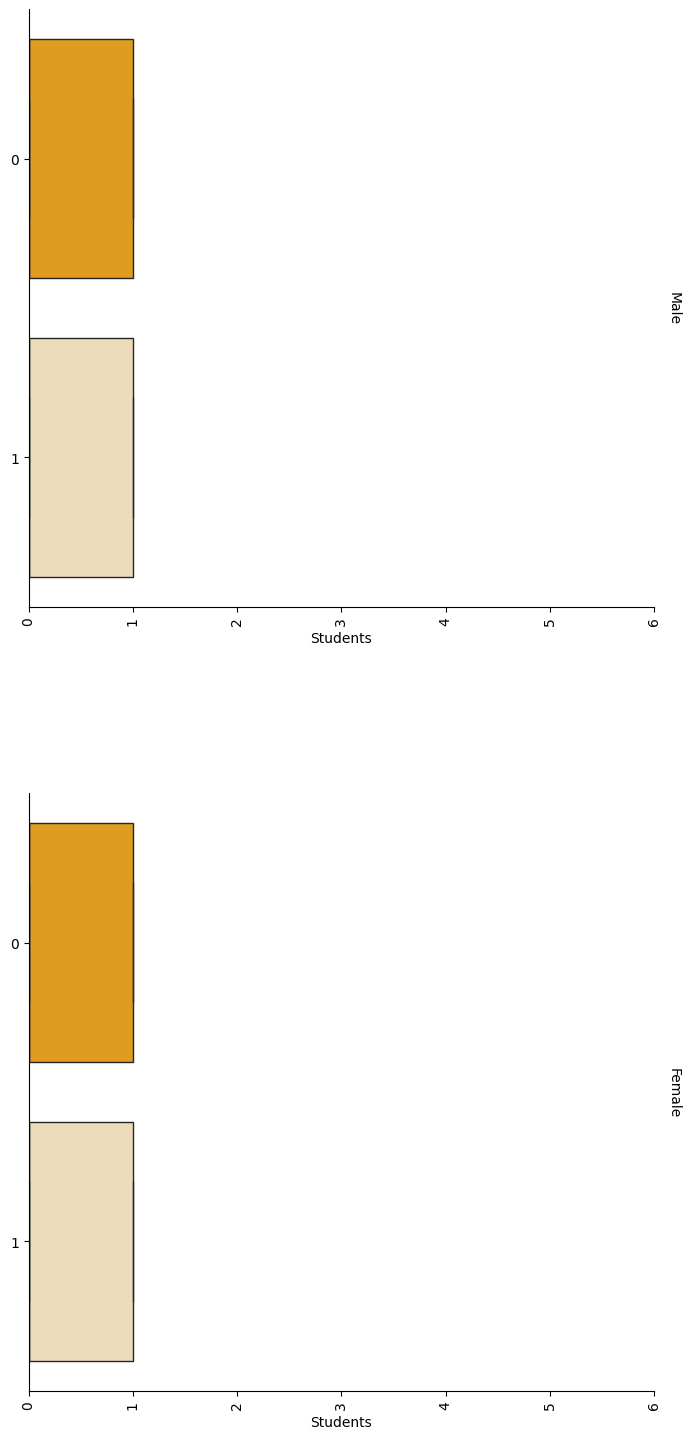

In [ ]:
palette = {
    'Male': 'blue',
    'Female': 'pink',
    'Yes': 'green',  # Keys should match the mapped values
    'No': 'red',    # Keys should match the mapped values
    '0': 'orange',  # Use string keys for encoded values
    '1': 'wheat'   # Use string keys for encoded values
}

students['Tutoring'] = encoded_students['Tutoring']

g = sns.catplot(
    data=students,
    x="Extracurricular", y="Tutoring", row='Gender',
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.8, aspect=4, palette=palette,
)
# Defining axis labels
g.set(xlabel="Students", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

plt.subplots_adjust(top=4.0)
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Let's now focus on a specific relationship: Item Size and Color!

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

<Axes: xlabel='Tutoring', ylabel='Gender'>

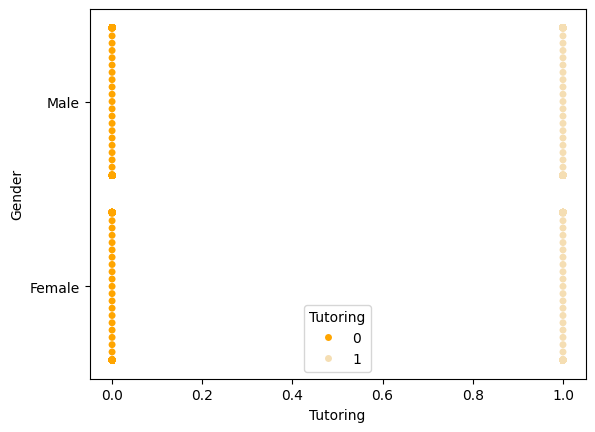

In [ ]:
# Suppressing warning message claiming that a portion of points cannot be placed into the plot due to the high number of data points
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
    0: 'orange',
    1: 'wheat'
}
sns.swarmplot(x="Tutoring", y="Gender", hue="Tutoring", data=encoded_students, palette=palette)

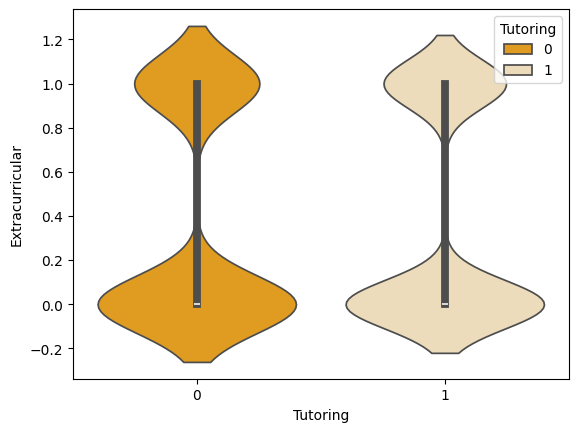

In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='seaborn')

palette = {
    0: 'orange',
    1: 'wheat'
}

# Use a violin plot instead of swarmplot for better performance with large datasets
sns.violinplot(x="Tutoring", y="Extracurricular", hue="Tutoring", data=encoded_students, palette=palette)
plt.show()

**Watch out**: Ignoring warnings is NOT a best practice and should be avoid, whenever possible. Warnings often contain useful messages that let us improve our code and solve an issue.
The reason why we are ignoring this specific warning is to guarantee the readability of the plot. Plotting all the data points with a reduced marker size, while keeping consistency with the palette color, generates an unclear visualization.

# Build your model

In [ ]:
from sklearn.model_selection import train_test_split
# X is the encoded features
X = encoded_students[encoded_students.columns.difference(['Tutoring'])]
# y is the encoded label
y = encoded_students['Tutoring']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

# Se vuelve a pasar de categórica a numérica

# Definir las columnas que son categóricas y necesitan ser transformadas
categorical_columns = ['Gender']

# Definir el preprocesamiento de datos usando ColumnTransformer y Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ],
    remainder='passthrough'  # Mantener las otras columnas en su forma original si es necesario
)

# Definir el modelo de regresión logística
model = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=10000))
    ]
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
predictions = model.predict(X_test)

# Evaluar el modelo y mostrar los resultados
print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('F1-score: ', f1_score(y_test, predictions, average='weighted'))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       144
           1       0.70      1.00      0.82       335

    accuracy                           0.70       479
   macro avg       0.35      0.50      0.41       479
weighted avg       0.49      0.70      0.57       479

Predicted labels:  [1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from tabulate import tabulate

# Calcular la matriz de confusión
TN = np.sum((y_test == 0) & (predictions == 0))
TP = np.sum((y_test == 1) & (predictions == 1))
FP = np.sum((y_test == 0) & (predictions == 1))
FN = np.sum((y_test == 1) & (predictions == 0))

matrix_confusion = np.array([[TN, FP], [FN, TP]])
print(matrix_confusion)

# Calcular métricas manualmente
precision = np.round((TP / (TP + FP)), 2)
recall = np.round((TP / (FN + TP)), 2)
f1 = np.round((2 * ((precision * recall) / (precision + recall))), 2)
accuracy = np.round(((TP + TN) / (TP + TN + FP + FN)), 2)

# Calcular métricas usando funciones de scikit-learn
precision_f = np.round(precision_score(y_test, predictions), 2)
recall_f = np.round(recall_score(y_test, predictions), 2)
f1_f = np.round(f1_score(y_test, predictions), 2)
accuracy_f = np.round(accuracy_score(y_test, predictions), 2)

# Imprimir resultados
print("Métricas de evaluación del modelo:")
print("---------------------------------")
print("            Python   Manual")
print(f"Precisión:   {precision_f:<8}   {precision}")
print(f"Recall:      {recall_f:<8}   {recall}")
print(f"F1-score:    {f1_f:<8}   {f1}")
print(f"Accuracy:    {accuracy_f:<8}   {accuracy}")
print("---------------------------------")

table_data = [
    ["Precisión", precision_f, precision],
    ["Recall", recall_f, recall],
    ["F1-score", f1_f, f1],
    ["Accuracy", accuracy_f, accuracy]
]

# Imprimir la tabla usando tabulate
print(tabulate(table_data, headers=["Métrica", "Python", "Manual"], tablefmt="fancy_grid"))

[[  0 144]
 [  1 334]]
Métricas de evaluación del modelo:
---------------------------------
            Python   Manual
Precisión:   0.7        0.7
Recall:      1.0        1.0
F1-score:    0.82       0.82
Accuracy:    0.7        0.7
---------------------------------
╒═══════════╤══════════╤══════════╕
│ Métrica   │   Python │   Manual │
╞═══════════╪══════════╪══════════╡
│ Precisión │     0.7  │     0.7  │
├───────────┼──────────┼──────────┤
│ Recall    │     1    │     1    │
├───────────┼──────────┼──────────┤
│ F1-score  │     0.82 │     0.82 │
├───────────┼──────────┼──────────┤
│ Accuracy  │     0.7  │     0.7  │
╘═══════════╧══════════╧══════════╛


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matriz = confusion_matrix(y_test, predictions)
conf_matriz

array([[  0, 144],
       [  1, 334]])

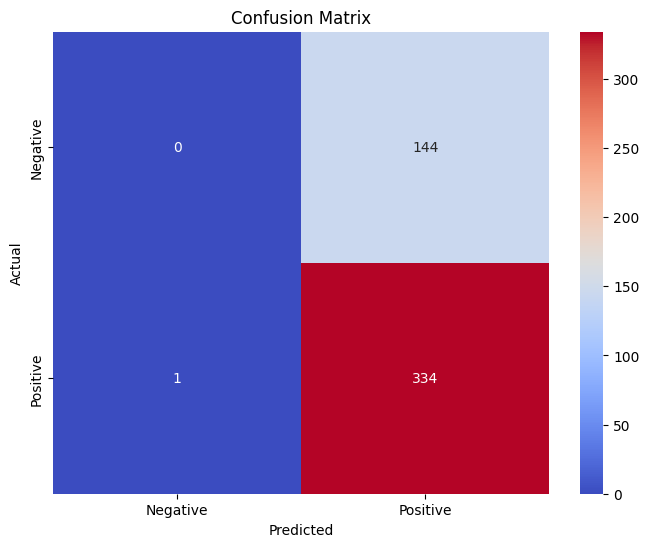

In [ ]:
# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matriz, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

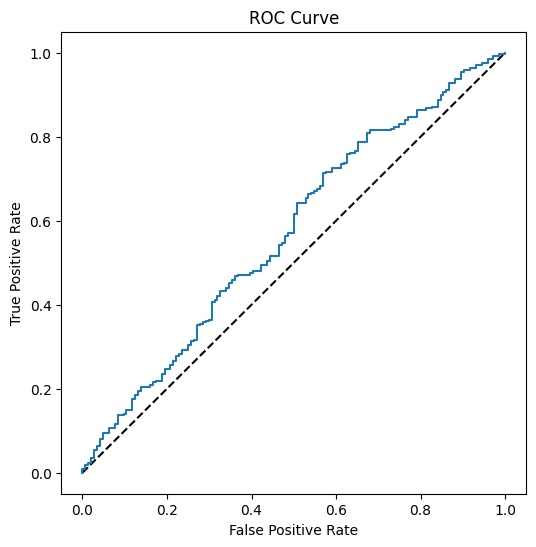

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
# Calculate AUC score
auc = roc_auc_score(y_test,y_scores[:,1])
print(auc)

0.5698175787728026
